# Feature Matching

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def display(img, cmap = 'gray'):
    fig = plt.figure(figsize = (12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap = 'gray')

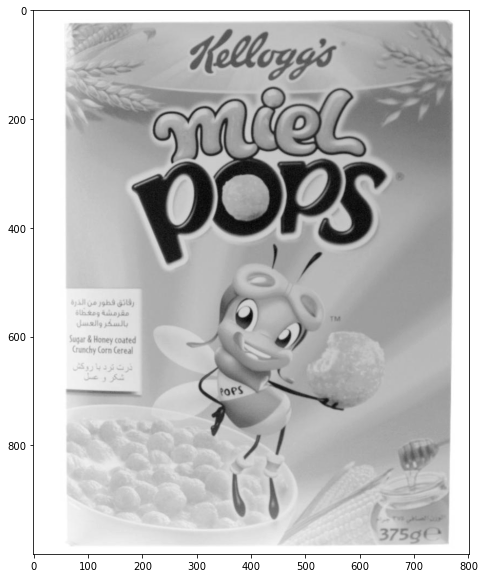

In [3]:
mielpops = cv2.imread('../images/miel_pops.jpeg',0)
display(mielpops)

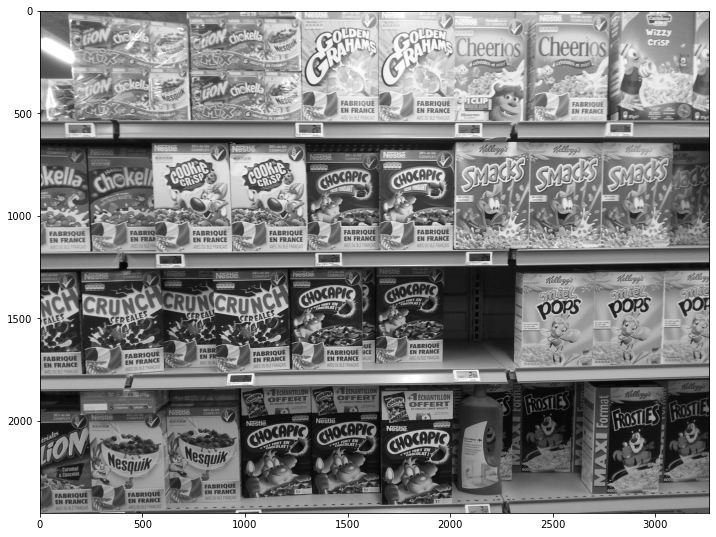

In [4]:
cereals = cv2.imread('../images/cereals.jpeg',0)
display(cereals)

## Brute-Force Matching with ORB Descriptors

In [5]:
orb = cv2.ORB_create()

In [8]:
kp1, des1 = orb.detectAndCompute(mielpops, None)
kp2, des2 = orb.detectAndCompute(cereals, None)

In [9]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)

In [10]:
matches = bf.match(des1, des2)

In [11]:
matches = sorted(matches, key = lambda x:x.distance)

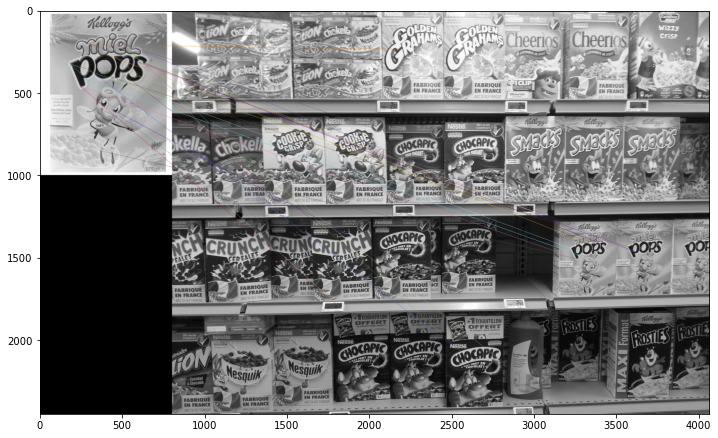

In [14]:
result_matches = cv2.drawMatches(mielpops, kp1, cereals, kp2, matches[:25], None, flags=2)
display(result_matches)

## Brute-Force Matching with SIFT Descriptors and Ratio Test

In [15]:
sift = cv2.xfeatures2d.SIFT_create()

In [16]:
kp1, des1 = sift.detectAndCompute(mielpops, None)
kp2, des2 = sift.detectAndCompute(cereals, None)

In [17]:
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k = 2)

### Ratio Test

In [18]:
good = []
for match1, match2 in matches:
    if match1.distance < 0.75 * match2.distance:
        good.append([match1])

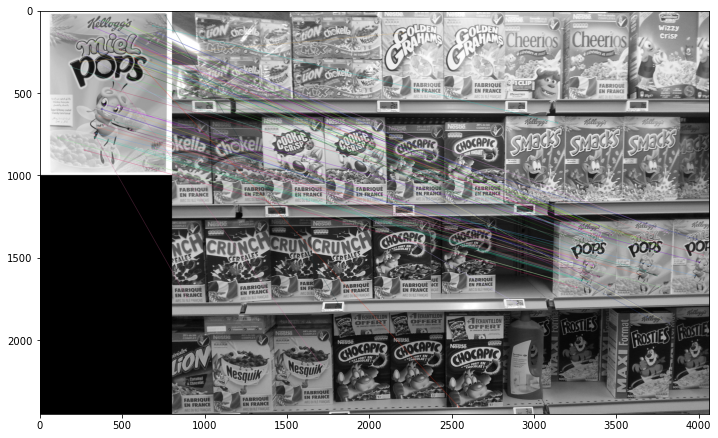

In [19]:
sift_matches = cv2.drawMatchesKnn(mielpops, kp1, cereals, kp2, good, None, flags=2)
display(sift_matches)

## FLANN Based Matcher

In [20]:
sift = cv2.xfeatures2d.SIFT_create()

In [21]:
kp1, des1 = sift.detectAndCompute(mielpops, None)
kp2, des2 = sift.detectAndCompute(cereals, None)

In [22]:
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50) 

In [23]:
flann = cv2.FlannBasedMatcher(index_params, search_params)

In [24]:
matches = flann.knnMatch(des1, des2 ,k=2)

### Ratio Test

In [25]:
good = []
for i,(match1, match2) in enumerate(matches):
    if match1.distance < 0.7 * match2.distance:
        
        good.append([match1])

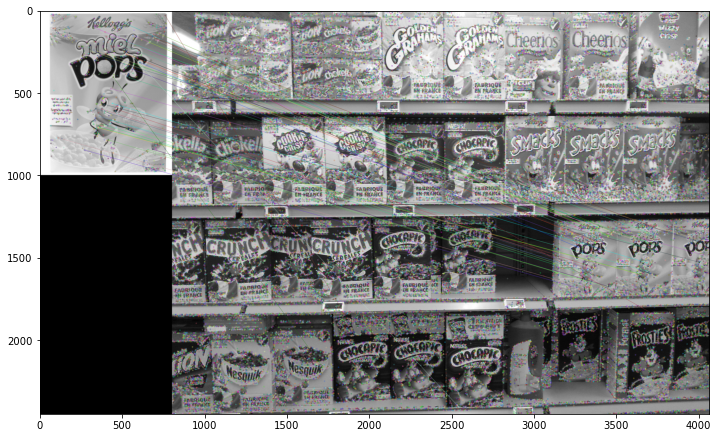

In [28]:
flann_matches = cv2.drawMatchesKnn(mielpops, kp1, cereals, kp2, good, None, flags=0)
display(flann_matches)

In [29]:
sift = cv2.xfeatures2d.SIFT_create()

In [30]:
kp1, des1 = sift.detectAndCompute(mielpops, None)
kp2, des2 = sift.detectAndCompute(cereals, None)

In [31]:
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50) 

In [32]:
flann = cv2.FlannBasedMatcher(index_params, search_params)

In [33]:
matches = flann.knnMatch(des1, des2, k=2)

In [34]:
matchesMask = [[0,0] for i in range(len(matches))]

In [35]:
for i,(match1, match2) in enumerate(matches):
    if match1.distance < 0.7 * match2.distance:
        matchesMask[i] = [1, 0]

In [36]:
draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = 0)

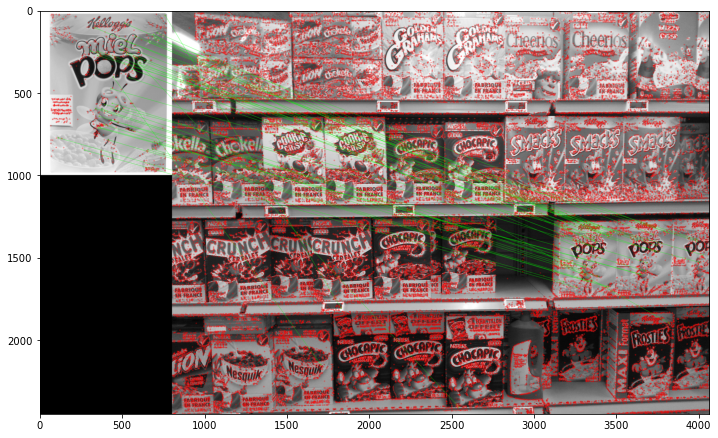

In [37]:
flann_matches = cv2.drawMatchesKnn(mielpops, kp1, cereals, kp2, matches, None, **draw_params)
display(flann_matches)